# **1. Perkenalan Dataset**


Saya memakai dataset dari Kaggle, yang punya 2736 baris dan 18 kolom. Dataset ini tidak mwmiliki label, jadi saya memakai clustering untuk mengelompokkan datanya berdasarkan kesamaan. Di dalamnya ada fitur numerik, seperti kecepatan kapal (Speed_Over_Ground_knots) atau tenaga mesin (Engine_Power_kW), dan fitur kategorikal, seperti tipe kapal (Ship_Type) atau jenis rute (Route_Type).

# **2. Import Library**

Pada tahap ini, saya mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# **3. Memuat Dataset**

Pada tahap ini, saya perlu memuat dataset ke dalam notebook. Dataset dalam format CSV, saya menggunakan pustaka pandas untuk membacanya.

In [2]:
df = pd.read_csv('Dataset_clustering.csv')
df = df.iloc[:, 1:]
df.head()

,Ship_Type,Route_Type,Engine_Type,Maintenance_Status,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Weather_Condition,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,Weekly_Voyage_Count,Average_Load_Percentage
0,Container Ship,NaN,Heavy Fuel Oil (HFO),Critical,12.597558,2062.983982,1030.943616,14.132284,Moderate,1959.017882,483832.354540,292183.273104,25.867077,1.455179,1.415653,1,93.769249
1,Fish Carrier,Short-haul,Steam Turbine,Good,10.387580,1796.057415,1060.486382,14.653083,Rough,162.394712,483388.000509,883765.787360,63.248196,0.290361,0.885648,6,93.895372
2,Container Ship,Long-haul,Diesel,Fair,20.749747,1648.556685,658.874144,7.199261,Moderate,178.040917,448543.404044,394018.746904,49.418150,0.499595,1.405813,9,96.218244
3,Bulk Carrier,Transoceanic,Steam Turbine,Fair,21.055102,915.261795,1126.822519,11.789063,Moderate,1737.385346,261349.605449,87551.375175,22.409110,0.702906,1.370704,1,66.193698
4,Fish Carrier,Transoceanic,Diesel,Fair,13.742777,1089.721803,1445.281159,9.727833,Moderate,260.595103,287718.375160,676121.459632,64.158231,1.331343,0.583383,8,80.008581


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, saya melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

## 1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

In [3]:
#Check dataset dimensions
print(f"Dataset dimensions: {df.shape}")

Dataset dimensions: (2736, 17)


In [4]:
# Cek beberapa baris awal
print("5 baris pertama dataset:")
df.head()

5 baris pertama dataset:


,Ship_Type,Route_Type,Engine_Type,Maintenance_Status,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Weather_Condition,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,Weekly_Voyage_Count,Average_Load_Percentage
0,Container Ship,NaN,Heavy Fuel Oil (HFO),Critical,12.597558,2062.983982,1030.943616,14.132284,Moderate,1959.017882,483832.354540,292183.273104,25.867077,1.455179,1.415653,1,93.769249
1,Fish Carrier,Short-haul,Steam Turbine,Good,10.387580,1796.057415,1060.486382,14.653083,Rough,162.394712,483388.000509,883765.787360,63.248196,0.290361,0.885648,6,93.895372
2,Container Ship,Long-haul,Diesel,Fair,20.749747,1648.556685,658.874144,7.199261,Moderate,178.040917,448543.404044,394018.746904,49.418150,0.499595,1.405813,9,96.218244
3,Bulk Carrier,Transoceanic,Steam Turbine,Fair,21.055102,915.261795,1126.822519,11.789063,Moderate,1737.385346,261349.605449,87551.375175,22.409110,0.702906,1.370704,1,66.193698
4,Fish Carrier,Transoceanic,Diesel,Fair,13.742777,1089.721803,1445.281159,9.727833,Moderate,260.595103,287718.375160,676121.459632,64.158231,1.331343,0.583383,8,80.008581


In [5]:
# Cek tipe data
print("\nTipe data:")
print(df.dtypes)


Tipe data:
Ship_Type                   object
Route_Type                  object
Engine_Type                 object
Maintenance_Status          object
Speed_Over_Ground_knots    float64
Engine_Power_kW            float64
Distance_Traveled_nm       float64
Draft_meters               float64
Weather_Condition           object
Cargo_Weight_tons          float64
Operational_Cost_USD       float64
Revenue_per_Voyage_USD     float64
Turnaround_Time_hours      float64
Efficiency_nm_per_kWh      float64
Seasonal_Impact_Score      float64
Weekly_Voyage_Count          int64
Average_Load_Percentage    float64
dtype: object


In [6]:
numeric_features = df.select_dtypes(exclude='object').columns.tolist()
print("Numeric features:", numeric_features)

Numeric features: ['Speed_Over_Ground_knots', 'Engine_Power_kW', 'Distance_Traveled_nm', 'Draft_meters', 'Cargo_Weight_tons', 'Operational_Cost_USD', 'Revenue_per_Voyage_USD', 'Turnaround_Time_hours', 'Efficiency_nm_per_kWh', 'Seasonal_Impact_Score', 'Weekly_Voyage_Count', 'Average_Load_Percentage']


In [7]:
categorical_features = df.select_dtypes(include='object').columns.tolist()
print("Categorical features:", categorical_features)

Categorical features: ['Ship_Type', 'Route_Type', 'Engine_Type', 'Maintenance_Status', 'Weather_Condition']


In [8]:
print("Columns in df:", df.columns.tolist())

Columns in df: ['Ship_Type', 'Route_Type', 'Engine_Type', 'Maintenance_Status', 'Speed_Over_Ground_knots', 'Engine_Power_kW', 'Distance_Traveled_nm', 'Draft_meters', 'Weather_Condition', 'Cargo_Weight_tons', 'Operational_Cost_USD', 'Revenue_per_Voyage_USD', 'Turnaround_Time_hours', 'Efficiency_nm_per_kWh', 'Seasonal_Impact_Score', 'Weekly_Voyage_Count', 'Average_Load_Percentage']


In [9]:
# Tinjau struktur data
print("\nInfo dataset:")
df.info()


Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2736 entries, 0 to 2735
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Ship_Type                2600 non-null   object 
 1   Route_Type               2600 non-null   object 
 2   Engine_Type              2600 non-null   object 
 3   Maintenance_Status       2600 non-null   object 
 4   Speed_Over_Ground_knots  2736 non-null   float64
 5   Engine_Power_kW          2736 non-null   float64
 6   Distance_Traveled_nm     2736 non-null   float64
 7   Draft_meters             2736 non-null   float64
 8   Weather_Condition        2600 non-null   object 
 9   Cargo_Weight_tons        2736 non-null   float64
 10  Operational_Cost_USD     2736 non-null   float64
 11  Revenue_per_Voyage_USD   2736 non-null   float64
 12  Turnaround_Time_hours    2736 non-null   float64
 13  Efficiency_nm_per_kWh    2736 non-null   float64
 14  Seasonal_

## 2. **Menangani Data yang Hilang**
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

In [10]:
# Cek missing values
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
Ship_Type                  136
Route_Type                 136
Engine_Type                136
Maintenance_Status         136
Speed_Over_Ground_knots      0
Engine_Power_kW              0
Distance_Traveled_nm         0
Draft_meters                 0
Weather_Condition          136
Cargo_Weight_tons            0
Operational_Cost_USD         0
Revenue_per_Voyage_USD       0
Turnaround_Time_hours        0
Efficiency_nm_per_kWh        0
Seasonal_Impact_Score        0
Weekly_Voyage_Count          0
Average_Load_Percentage      0
dtype: int64


## 3. **Analisis Distribusi dan Korelasi**
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

In [11]:
# Statistik deskriptif
print("\nStatistik deskriptif:")
df.describe()


Statistik deskriptif:


,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,Weekly_Voyage_Count,Average_Load_Percentage
count,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000
mean,17.602863,1757.610939,1036.406203,9.929103,1032.573264,255143.344488,521362.062011,41.747536,0.798656,1.003816,4.914839,75.219222
std,4.311979,717.002777,568.632080,2.876423,558.697499,140890.482189,271211.625499,17.633130,0.403590,0.288251,2.597647,14.510168
min,10.009756,501.025220,50.433150,5.001947,50.229624,10092.306318,50351.814447,12.019909,0.100211,0.500004,1.000000,50.012005
25%,13.928452,1148.104914,548.511573,7.437485,553.983629,131293.378767,290346.388017,26.173537,0.463592,0.758033,3.000000,62.703724
50%,17.713757,1757.494344,1037.816060,9.918965,1043.207497,257157.653226,520176.931762,41.585188,0.789877,1.009009,5.000000,75.504709
75%,21.284785,2382.594292,1540.934161,12.413149,1527.722391,381796.930499,750072.791216,57.363922,1.147426,1.252808,7.000000,87.721205
max,24.997043,2998.734329,1998.337057,14.992947,1999.126697,499734.867868,999916.696140,71.972415,1.499259,1.499224,9.000000,99.999643


## 4. **Visualisasi Data**
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

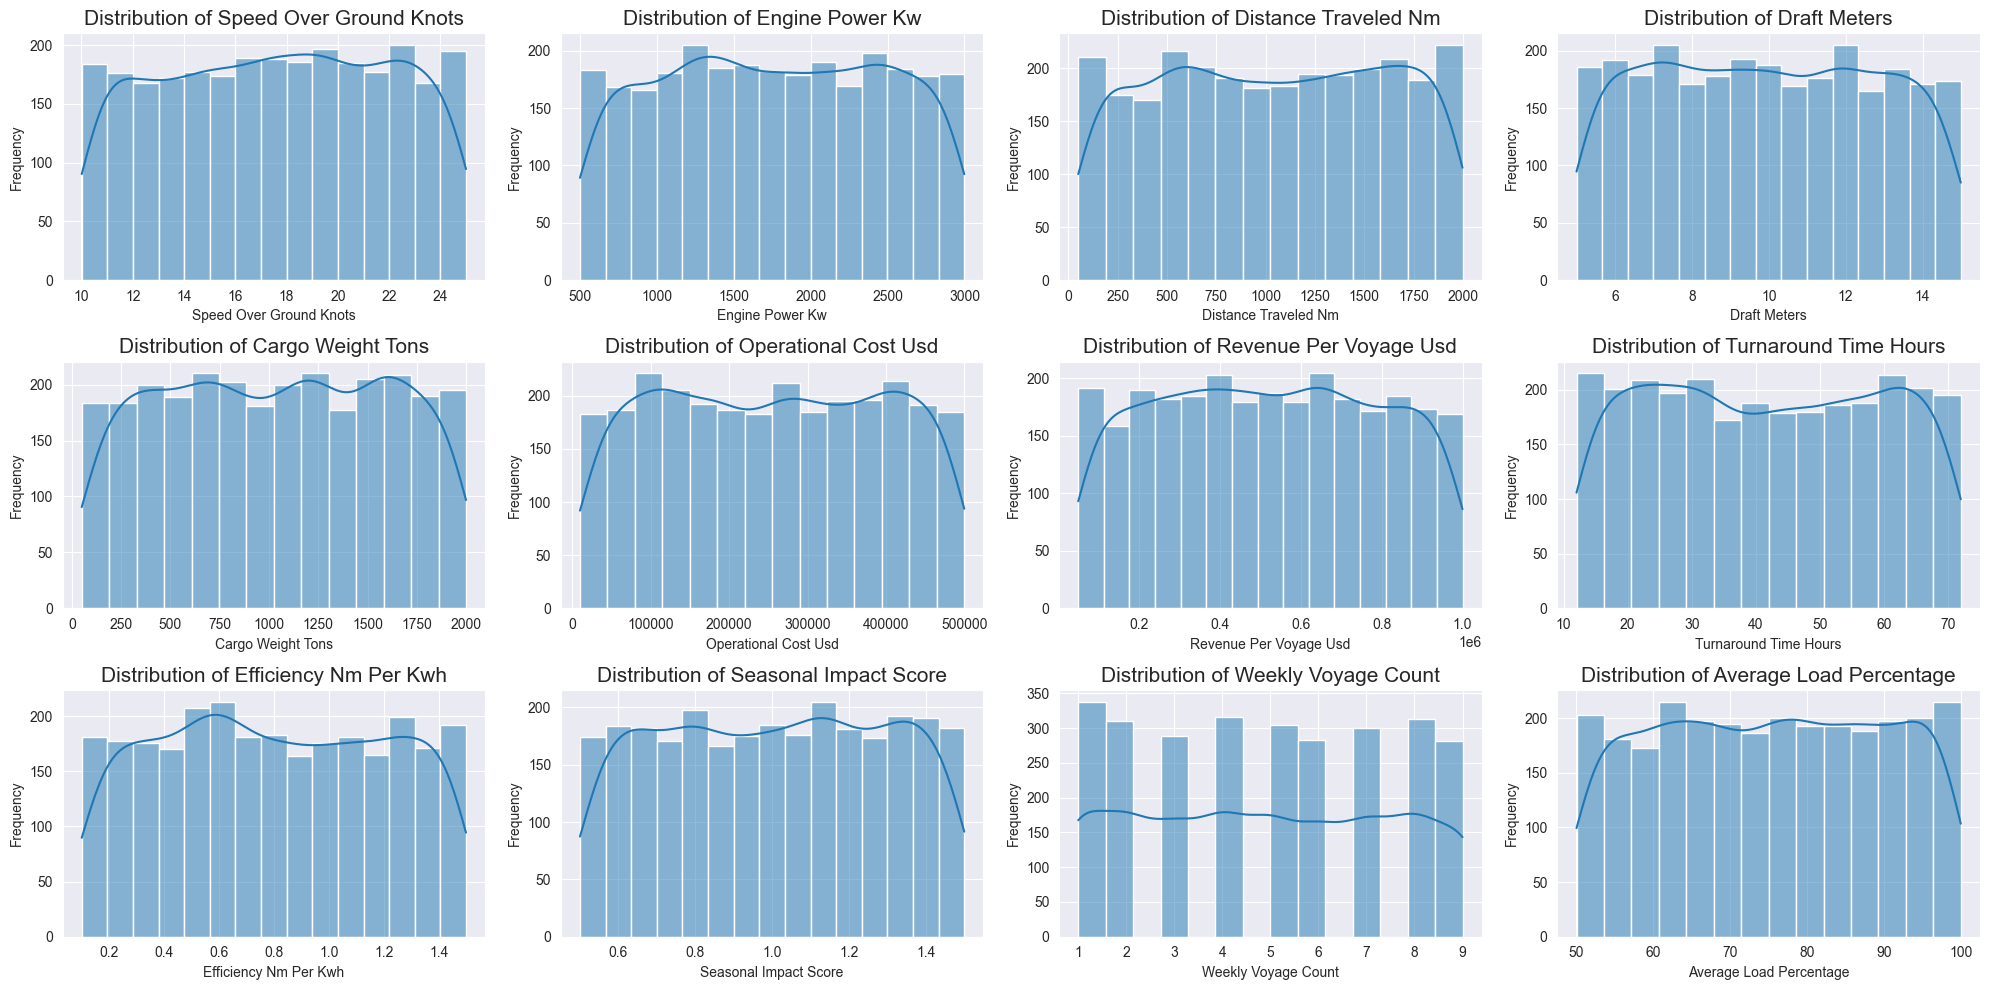

In [12]:
# Visualisasi kategorikal
plt.figure(figsize=(20, 10))
for i, col in enumerate(df.select_dtypes(exclude='object').columns.tolist()):
    plt.subplot(3, 4, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col.replace("_", " ").title()}', size=15)
    plt.xlabel(f'{col.replace("_", " ").title()}')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

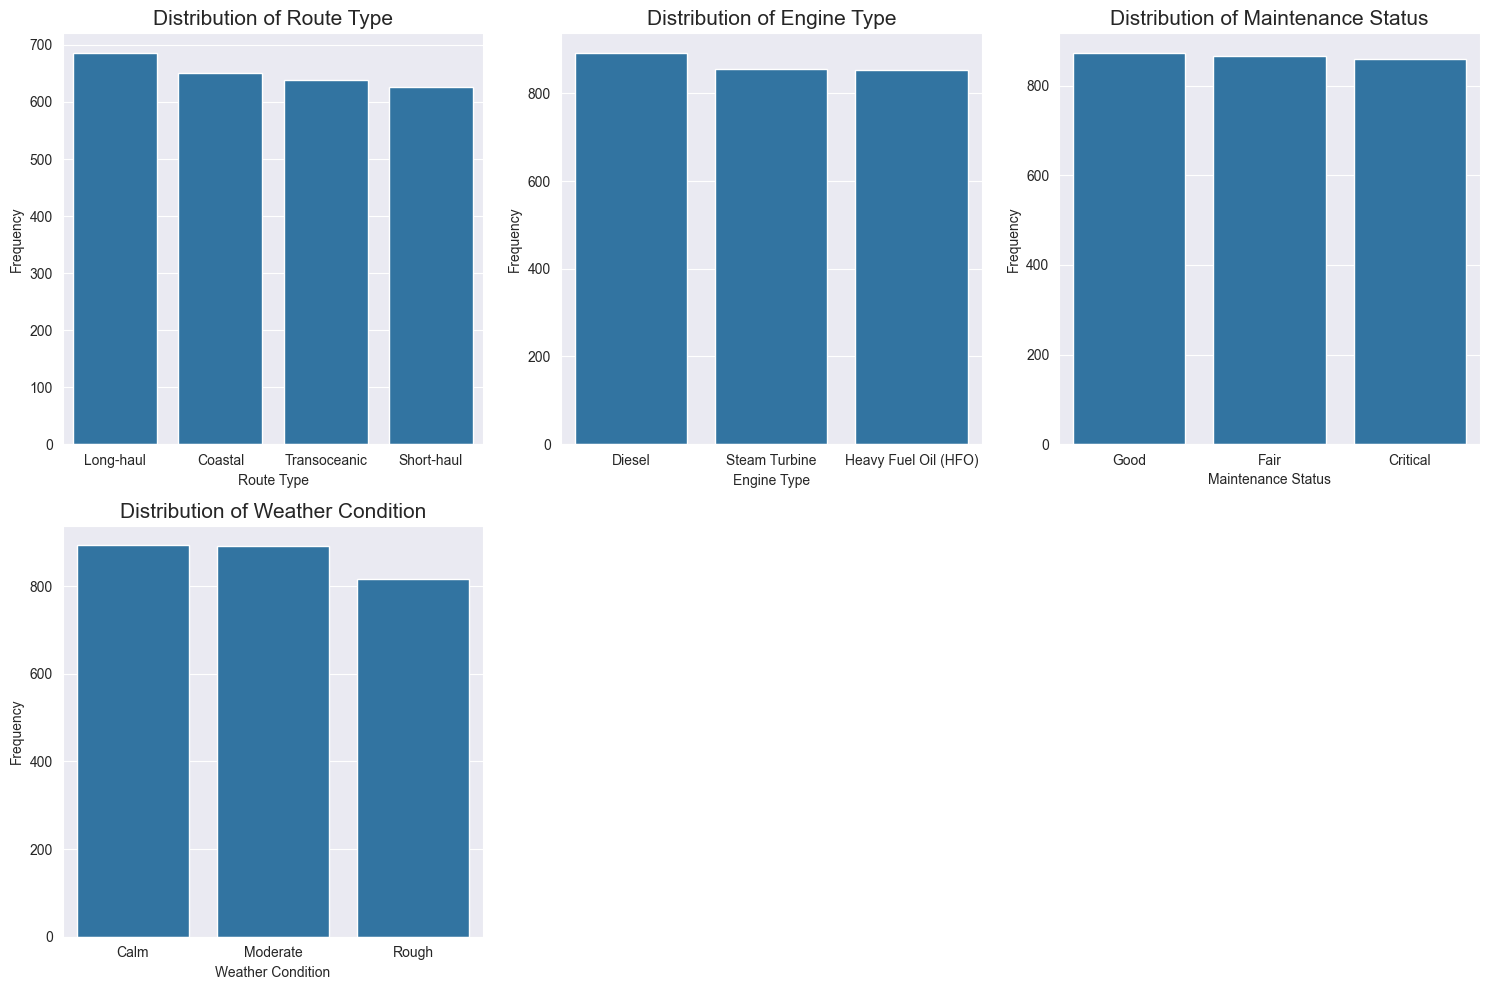

In [13]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.select_dtypes(include='object').columns.tolist()[1:]): # Exclude the first column (Date)
    plt.subplot(2, 3, i+1)
    sns.barplot(x=df[col].value_counts().index, y=df[col].value_counts().values)
    plt.title(f'Distribution of {col.replace("_", " ").title()}', size=15)
    plt.xlabel(f'{col.replace("_", " ").title()}')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

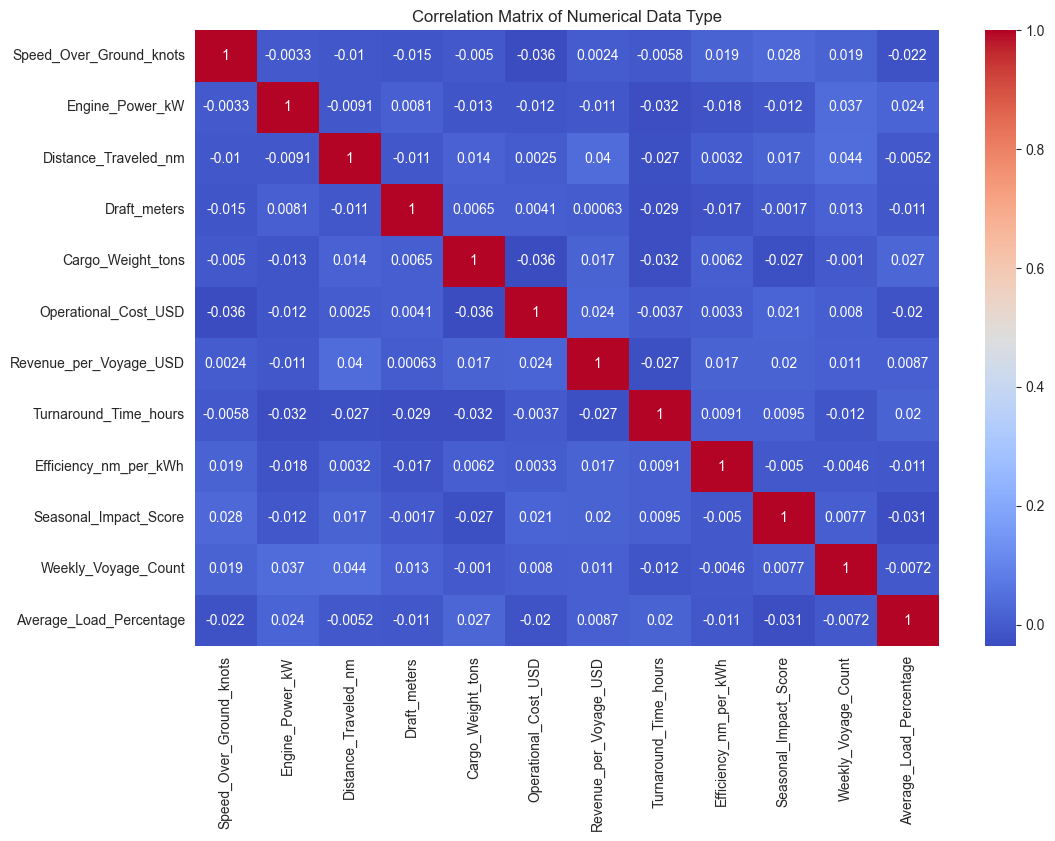

In [14]:
# Matrix correlation of numerical data type inside the dataset
df.select_dtypes(exclude='object').corr()
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(exclude='object').corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Numerical Data Type")
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

## Menghapus Data Kosong (Missing Values)

In [15]:
# Drop the missing values in the dataset
df.dropna(inplace=True)
print("Here the missing values after cleaning :")
print(df.isnull().sum())

Here the missing values after cleaning :
Ship_Type                  0
Route_Type                 0
Engine_Type                0
Maintenance_Status         0
Speed_Over_Ground_knots    0
Engine_Power_kW            0
Distance_Traveled_nm       0
Draft_meters               0
Weather_Condition          0
Cargo_Weight_tons          0
Operational_Cost_USD       0
Revenue_per_Voyage_USD     0
Turnaround_Time_hours      0
Efficiency_nm_per_kWh      0
Seasonal_Impact_Score      0
Weekly_Voyage_Count        0
Average_Load_Percentage    0
dtype: int64


## Menghapus Data Duplikat

In [16]:
# Menghapus data duplikat
df = df.drop_duplicates()
df.head()

,Ship_Type,Route_Type,Engine_Type,Maintenance_Status,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Weather_Condition,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,Weekly_Voyage_Count,Average_Load_Percentage
1,Fish Carrier,Short-haul,Steam Turbine,Good,10.387580,1796.057415,1060.486382,14.653083,Rough,162.394712,483388.000509,883765.787360,63.248196,0.290361,0.885648,6,93.895372
2,Container Ship,Long-haul,Diesel,Fair,20.749747,1648.556685,658.874144,7.199261,Moderate,178.040917,448543.404044,394018.746904,49.418150,0.499595,1.405813,9,96.218244
3,Bulk Carrier,Transoceanic,Steam Turbine,Fair,21.055102,915.261795,1126.822519,11.789063,Moderate,1737.385346,261349.605449,87551.375175,22.409110,0.702906,1.370704,1,66.193698
4,Fish Carrier,Transoceanic,Diesel,Fair,13.742777,1089.721803,1445.281159,9.727833,Moderate,260.595103,287718.375160,676121.459632,64.158231,1.331343,0.583383,8,80.008581
5,Fish Carrier,Long-haul,Heavy Fuel Oil (HFO),Fair,18.616196,2171.646567,723.304215,14.916320,Rough,1912.509751,184569.045384,776698.354849,47.476155,1.370206,1.437725,7,53.174898


## Normalisasi atau Standarisasi Fitur

In [17]:
# Label Encoding for the categorical data type and standardization to categorical data type
numeric_df = df.select_dtypes(exclude='object').columns.tolist()
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df[numeric_df])
df_scaled = pd.DataFrame(df_scaled, columns=numeric_df)

label_encoders = {}
object_cols = df.select_dtypes(include='object').columns.tolist()
df_encoded = pd.DataFrame()

for col in object_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df[col])
    label_encoders[col] = le

new_df = pd.concat([df_scaled, df_encoded], axis=1)
new_df.sample(5)

,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,Weekly_Voyage_Count,Average_Load_Percentage,Ship_Type,Route_Type,Engine_Type,Maintenance_Status,Weather_Condition
511,0.475804,0.841416,0.448690,0.604040,0.405966,0.747544,0.424344,0.985054,0.946984,0.500017,0.625,0.903330,0,1,0,0,1
622,0.264286,0.902956,0.937736,0.376387,0.772007,0.457183,0.030654,0.881153,0.348193,0.069270,0.625,0.506630,0,2,0,1,2
2022,0.057316,0.713088,0.992213,0.090893,0.080704,0.732409,0.255245,0.777764,0.017420,0.939518,0.125,0.458580,3,0,2,2,2
727,0.746672,0.575924,0.911572,0.702826,0.239569,0.887367,0.156694,0.393072,0.226167,0.068698,0.500,0.075922,0,0,1,0,1
280,0.460085,0.463852,0.177537,0.947632,0.756235,0.785671,0.888390,0.205451,0.467191,0.005490,0.500,0.399706,3,3,0,2,2


In [18]:
#rasio efisiensi per tenaga mesin
new_df['Efficiency_per_Power'] = new_df['Efficiency_nm_per_kWh'] / (new_df['Engine_Power_kW'] + 1e-6)  # Tambah epsilon untuk menghindari pembagian nol
new_df['Speed_per_Distance'] = new_df['Speed_Over_Ground_knots'] / (new_df['Distance_Traveled_nm'] + 1e-6)

In [19]:
relevant_features = ['Speed_Over_Ground_knots', 'Engine_Power_kW', 'Distance_Traveled_nm',
                     'Efficiency_nm_per_kWh', 'Average_Load_Percentage', 'Efficiency_per_Power', 'Speed_per_Distance']
# Salin data dan simpan indeks asli
df_relevant = new_df[relevant_features].copy()
df_relevant['orig_index'] = new_df.index

In [20]:
# Hapus outlier pada setiap kolom numerik di df_relevant
numeric_relevant_cols = relevant_features  # Semua fitur relevan adalah numerik di sini
for col in numeric_relevant_cols:
    lower = df_relevant[col].quantile(0.01)
    upper = df_relevant[col].quantile(0.99)
    df_relevant = df_relevant[(df_relevant[col] >= lower) & (df_relevant[col] <= upper)]
print(f"Data untuk clustering setelah outlier removal: {df_relevant.shape}")

Data untuk clustering setelah outlier removal: (1841, 8)


In [21]:
print("Data dengan fitur relevan:")
df_relevant.head()

Data dengan fitur relevan:


,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Efficiency_nm_per_kWh,Average_Load_Percentage,Efficiency_per_Power,Speed_per_Distance,orig_index
0,0.025219,0.518350,0.518533,0.136018,0.878718,0.262404,0.048635,0
1,0.716864,0.459279,0.312357,0.285686,0.925231,0.622030,2.295010,1
2,0.737246,0.165608,0.552589,0.431118,0.324021,2.603226,1.334165,2
3,0.249169,0.235476,0.716076,0.880651,0.600650,3.739856,0.347963,3
4,0.574456,0.668767,0.345433,0.908450,0.063334,1.358394,1.662995,4


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini saya menggunakan algoritma DBSCAN.

DBSCAN mengelompokkan data berdasarkan kepadatan, dengan parameter eps (jarak maksimum antar titik dalam satu cluster) dan min_samples (jumlah minimum titik untuk membentuk cluster).



In [22]:
# DBSCAN sebelum k-distance
dbscan_before = DBSCAN(eps=1, min_samples=5)
labels_before = dbscan_before.fit_predict(df_relevant[relevant_features])

In [23]:
# Hitung jumlah klaster dan noise
n_clusters_before = len(set(labels_before)) - (1 if -1 in labels_before else 0)
n_noise_before = list(labels_before).count(-1)

In [24]:
# Hitung Silhouette Score
if n_clusters_before > 1:
    sil_score_before = silhouette_score(df_relevant[relevant_features], labels_before)
else:
    sil_score_before = 0

In [25]:
print("Hasil sebelum K-Distance:")
print(f"Jumlah klaster: {n_clusters_before}")
print(f"Jumlah noise: {n_noise_before}")
print(f"Silhouette Score: {sil_score_before:.2f}")

Hasil sebelum K-Distance:
Jumlah klaster: 5
Jumlah noise: 76
Silhouette Score: 0.60


## **b. Evaluasi Model Clustering**

Saya menggunakan K-distance graph Silhouette Score untuk mengevaluasi kualitas clustering. Skor ini mengukur seberapa baik titik-titik dalam cluster dibandingkan dengan cluster lain.


In [26]:
# --- K-Distance Graph untuk Data Sebelum Feature Selection ---
# Hitung jarak ke tetangga terdekat untuk menentukan eps
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(df_relevant[relevant_features])
distances, indices = neighbors_fit.kneighbors(df_relevant[relevant_features])

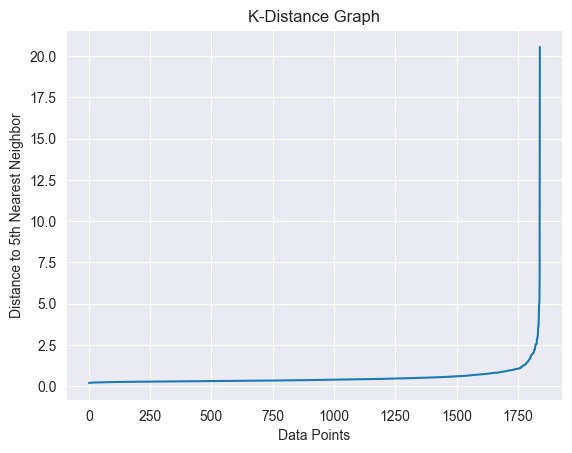

In [27]:
# Urutkan jarak dan plot
distances = np.sort(distances[:, 4], axis=0)
plt.plot(distances)
plt.xlabel("Data Points")
plt.ylabel("Distance to 5th Nearest Neighbor")
plt.title("K-Distance Graph")
plt.show()

In [28]:
# Coba beberapa kombinasi eps dan min_samples dan log hasilnya
print("Mencoba kombinasi eps dan min_samples:")
eps_values = [0.3, 0.5, 0.7, 1.0, 1.5]  # Rentang lebih luas
min_samples_values = [3, 5, 7, 10, 15]

best_sil_score = -1
best_eps = None
best_min_samples = None
best_labels = []

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(df_relevant[relevant_features])
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        print(f"eps: {eps}, min_samples: {min_samples}, n_clusters: {n_clusters}")
        if n_clusters > 1: 
            sil_score = silhouette_score(df_relevant[relevant_features], labels)
            if sil_score > best_sil_score:
                best_sil_score = sil_score
                best_eps = eps
                best_min_samples = min_samples
                best_labels = labels

Mencoba kombinasi eps dan min_samples:
eps: 0.3, min_samples: 3, n_clusters: 41
eps: 0.3, min_samples: 5, n_clusters: 26
eps: 0.3, min_samples: 7, n_clusters: 11
eps: 0.3, min_samples: 10, n_clusters: 2
eps: 0.3, min_samples: 15, n_clusters: 1
eps: 0.5, min_samples: 3, n_clusters: 23
eps: 0.5, min_samples: 5, n_clusters: 5
eps: 0.5, min_samples: 7, n_clusters: 4
eps: 0.5, min_samples: 10, n_clusters: 1
eps: 0.5, min_samples: 15, n_clusters: 1
eps: 0.7, min_samples: 3, n_clusters: 17
eps: 0.7, min_samples: 5, n_clusters: 6
eps: 0.7, min_samples: 7, n_clusters: 3
eps: 0.7, min_samples: 10, n_clusters: 1
eps: 0.7, min_samples: 15, n_clusters: 2
eps: 1.0, min_samples: 3, n_clusters: 5
eps: 1.0, min_samples: 5, n_clusters: 5
eps: 1.0, min_samples: 7, n_clusters: 4
eps: 1.0, min_samples: 10, n_clusters: 2
eps: 1.0, min_samples: 15, n_clusters: 1
eps: 1.5, min_samples: 3, n_clusters: 5
eps: 1.5, min_samples: 5, n_clusters: 4
eps: 1.5, min_samples: 7, n_clusters: 2
eps: 1.5, min_samples: 10, n

In [29]:
# Hasil setelah tuning
n_clusters_tuned = len(set(best_labels)) - (1 if -1 in best_labels else 0)
n_noise_tuned = list(best_labels).count(-1)

In [30]:
print("Hasil setelah K-Distance:")
print(f"Parameter terbaik: eps={best_eps}, min_samples={best_min_samples}")
print(f"Jumlah klaster: {n_clusters_tuned}")
print(f"Jumlah noise: {n_noise_tuned}")
print(f"Silhouette Score: {best_sil_score:.2f}")

Hasil setelah K-Distance:
Parameter terbaik: eps=1.5, min_samples=7
Jumlah klaster: 2
Jumlah noise: 43
Silhouette Score: 0.78


## **c. Feature Selection (Opsional)**

Selanjutnya saya akan melakukan optimasi model clustering  Terakhir, saya akan membandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [31]:
# Feature selection dengan PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_relevant[relevant_features])

In [32]:
# DBSCAN setelah feature selection
dbscan_after = DBSCAN(eps=best_eps, min_samples=best_min_samples)
labels_after = dbscan_after.fit_predict(df_pca)

In [33]:
# Hitung jumlah klaster dan noise
n_clusters_after = len(set(labels_after)) - (1 if -1 in labels_after else 0)
n_noise_after = list(labels_after).count(-1)

In [34]:
# Hitung Silhouette Score
if n_clusters_after > 1:
    sil_score_after = silhouette_score(df_pca, labels_after)
else:
    sil_score_after = "N/A (kurang dari 2 klaster)"

print("Hasil setelah Feature Selection:")
print(f"Jumlah klaster: {n_clusters_after}")
print(f"Jumlah noise: {n_noise_after}")
print(f"Silhouette Score: {sil_score_after:.2f}")

Hasil setelah Feature Selection:
Jumlah klaster: 2
Jumlah noise: 40
Silhouette Score: 0.79


In [35]:
#Tabel perbandingan hasil clustering
print("\nHasil yang Diperoleh Silhouette Score:")
print(f"{'Before K-Distance':<20}{'After K-Distance':<20}{'After Feature Selection':<40}")
print(f"{sil_score_before:<20.2f}{best_sil_score:<20.2f}{sil_score_after:<40.2f}")



Hasil yang Diperoleh Silhouette Score:
Before K-Distance   After K-Distance    After Feature Selection                 
0.60                0.78                0.79                                    


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

In [36]:
pca = PCA(n_components=2)
df_pca_all = pca.fit_transform(df_pca)

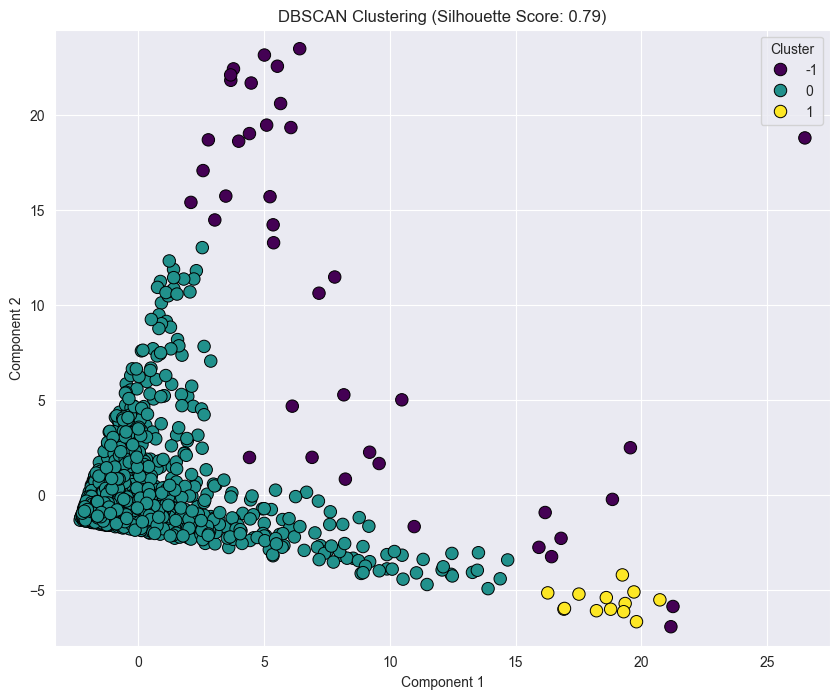

In [37]:
# Contoh plot dengan figur lebih besar dan xlim, ylim diatur manual
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=df_pca_all[:, 0],
    y=df_pca_all[:, 1],
    hue=labels_after,
    palette="viridis",
    s=80,
    edgecolor="black"
)

# Perlebar batas sumbu
x_min, x_max = df_pca_all[:, 0].min() - 1, df_pca_all[:, 0].max() + 1
y_min, y_max = df_pca_all[:, 1].min() - 1, df_pca_all[:, 1].max() + 1
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.title(f'DBSCAN Clustering (Silhouette Score: {sil_score_after:.2f})')
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.legend(title="Cluster", loc="best")
plt.grid(True)
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [38]:
new_df.loc[df_relevant['orig_index'], 'Cluster'] = labels_after

In [39]:
# Cek hasil assign label
print("\nContoh data new_df setelah penambahan label cluster:")
print(new_df[['Cluster']].dropna())


Contoh data new_df setelah penambahan label cluster:
      Cluster
0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
...       ...
2122      1.0
2123      0.0
2124      0.0
2125      0.0
2126      0.0

[1841 rows x 1 columns]


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [40]:
df_inversed_numeric = pd.DataFrame(
    scaler.inverse_transform(new_df[numeric_df]),
    columns=numeric_df
)

In [41]:
# Inverse untuk fitur kategorikal
df_inversed_categorical = pd.DataFrame()
for col in object_cols:
    # Pastikan nilai di kolom diubah ke integer
    cat_values = new_df[col].astype(int)
    df_inversed_categorical[col] = label_encoders[col].inverse_transform(cat_values)

In [42]:
# Gabungkan kembali hasil inverse transform sesuai urutan asli
df_original_inverse = pd.concat([df_inversed_numeric, df_inversed_categorical], axis=1)

In [43]:
if 'Cluster' in new_df.columns:
    df_original_inverse['Cluster'] = new_df['Cluster']
else:
    print("Kolom 'Cluster' tidak ditemukan di new_df.")

In [44]:
print("\nContoh data setelah inverse transform (kembali ke data asli):")
df_original_inverse


Contoh data setelah inverse transform (kembali ke data asli):


,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,Weekly_Voyage_Count,Average_Load_Percentage,Ship_Type,Route_Type,Engine_Type,Maintenance_Status,Weather_Condition,Cluster
0,10.387580,1796.057415,1060.486382,14.653083,162.394712,483388.000509,883765.787360,63.248196,0.290361,0.885648,6.0,93.895372,Fish Carrier,Short-haul,Steam Turbine,Good,Rough,0.0
1,20.749747,1648.556685,658.874144,7.199261,178.040917,448543.404044,394018.746904,49.418150,0.499595,1.405813,9.0,96.218244,Container Ship,Long-haul,Diesel,Fair,Moderate,0.0
2,21.055102,915.261795,1126.822519,11.789063,1737.385346,261349.605449,87551.375175,22.409110,0.702906,1.370704,1.0,66.193698,Bulk Carrier,Transoceanic,Steam Turbine,Fair,Moderate,0.0
3,13.742777,1089.721803,1445.281159,9.727833,260.595103,287718.375160,676121.459632,64.158231,1.331343,0.583383,8.0,80.008581,Fish Carrier,Transoceanic,Diesel,Fair,Moderate,0.0
4,18.616196,2171.646567,723.304215,14.916320,1912.509751,184569.045384,776698.354849,47.476155,1.370206,1.437725,7.0,53.174898,Fish Carrier,Long-haul,Heavy Fuel Oil (HFO),Fair,Rough,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2122,24.257402,1813.474360,147.964296,10.378736,1450.181358,266359.224719,820652.038923,34.433655,0.708172,1.352973,7.0,51.258697,Container Ship,Long-haul,Heavy Fuel Oil (HFO),Good,Moderate,1.0
2123,15.649207,1662.426557,1175.942724,12.564046,451.670997,393827.995941,567287.169653,22.281638,0.356031,1.079178,2.0,92.926949,Tanker,Long-haul,Diesel,Critical,Rough,0.0
2124,11.607997,2918.395972,239.990359,13.700906,318.111891,237975.067292,731584.322921,47.152337,1.000265,1.284895,3.0,74.813114,Tanker,Short-haul,Heavy Fuel Oil (HFO),Good,Moderate,0.0
2125,23.132643,2028.143572,619.236340,6.623856,153.441965,25241.550250,799713.737211,14.335517,0.895670,0.902960,2.0,92.853622,Tanker,Transoceanic,Heavy Fuel Oil (HFO),Good,Moderate,0.0


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [45]:
print(new_df.columns)

Index(['Speed_Over_Ground_knots', 'Engine_Power_kW', 'Distance_Traveled_nm',
       'Draft_meters', 'Cargo_Weight_tons', 'Operational_Cost_USD',
       'Revenue_per_Voyage_USD', 'Turnaround_Time_hours',
       'Efficiency_nm_per_kWh', 'Seasonal_Impact_Score', 'Weekly_Voyage_Count',
       'Average_Load_Percentage', 'Ship_Type', 'Route_Type', 'Engine_Type',
       'Maintenance_Status', 'Weather_Condition', 'Efficiency_per_Power',
       'Speed_per_Distance', 'Cluster'],
      dtype='object')


In [46]:
print(df_original_inverse.columns)

Index(['Speed_Over_Ground_knots', 'Engine_Power_kW', 'Distance_Traveled_nm',
       'Draft_meters', 'Cargo_Weight_tons', 'Operational_Cost_USD',
       'Revenue_per_Voyage_USD', 'Turnaround_Time_hours',
       'Efficiency_nm_per_kWh', 'Seasonal_Impact_Score', 'Weekly_Voyage_Count',
       'Average_Load_Percentage', 'Ship_Type', 'Route_Type', 'Engine_Type',
       'Maintenance_Status', 'Weather_Condition', 'Cluster'],
      dtype='object')


In [47]:
# Lakukan groupby pada kolom "Cluster"
cluster_analysis = df_original_inverse.groupby('Cluster').agg({
    'Speed_Over_Ground_knots': ['mean', 'min', 'max'],
    'Engine_Power_kW': ['mean', 'min', 'max'],
    'Distance_Traveled_nm': ['mean', 'min', 'max'],
    'Efficiency_nm_per_kWh': ['mean', 'min', 'max'],
    'Average_Load_Percentage': ['mean', 'min', 'max'],
})

In [48]:
print("Analisis Karakteristik Cluster:")
cluster_analysis

Analisis Karakteristik Cluster:


Speed_Over_Ground_knots                       Engine_Power_kW  \
                           mean        min        max            mean   
Cluster                                                                 
-1.0                  19.492878  10.784367  24.836188      765.812096   
 0.0                  17.570539  10.183887  24.846832     1775.215200   
 1.0                  20.452259  13.930437  24.770520     2018.564529   

                                 Distance_Traveled_nm                          \
                min          max                 mean        min          max   
Cluster                                                                         
-1.0     526.045305  2895.170490           542.486935  86.753612  1961.638898   
 0.0     546.456197  2975.275418          1063.182654  76.491653  1983.551729   
 1.0     759.487102  2615.403637           114.638343  73.457228   147.964296   

        Efficiency_nm_per_kWh                     Average_Load_Percentage  \
                         mean       min       max                    mean   
Cluster                                                                     
-1.0                 1.027508  0.457265  1.447414               76.111905   
 0.0                 0.786256  0.111141  1.484672               75.240751   
 1.0                 0.829301  0.129547  1.468170               71.386054   

                               
               min        max  
Cluster                        
-1.0     50.865721  98.682269  
 0.0     50.626009  99.384111  
 1.0     51.258697  95.501777

# Analisis Karakteristik Cluster dari Model DBSCAN

Berdasarkan hasil agregasi statistik pada data operasional kapal, berikut adalah interpretasi untuk setiap cluster. Nilai agregat yang digunakan adalah:

- Untuk fitur numerik: *mean*, *min*, dan *max*.
- Untuk fitur kategorikal: *modus* (nilai yang paling sering muncul).

Label cluster dipetakan sebagai berikut:
- **Kapal Ekonomis**: Label -1.0
- **Kapal Jarak Jauh**: Label 0.0
- **Kapal Ekspres**: Label 1.0

---

## Kapal Ekonomis (Label: -1.0)

- **Speed_Over_Ground_knots:**
  - Rata-rata: 19.49
  - Rentang: 10.78 – 24.84
- **Engine_Power_kW:**
  - Rata-rata: 765,812.10
- **Distance_Traveled_nm:**
  - Rata-rata: 542,486.94
- **Efficiency_nm_per_kWh:**
  - Rata-rata: 1.03
- **Average_Load_Percentage:**
  - Rata-rata: 76.11

**Interpretasi:**
Klaster ini didapatkan karena, misalnya, fitur *Speed_Over_Ground_knots* memiliki rata-rata 19.49 (dengan rentang 10.78 – 24.84), yang menunjukkan bahwa kapal-kapal dalam segmen ini beroperasi dengan kecepatan yang rendah. Engine power yang relatif kecil (rata-rata 765,812.10) dan jarak tempuh yang moderat (rata-rata 542,486.94) mengindikasikan bahwa kapal-kapal tersebut cenderung beroperasi pada rute lokal dengan beban ringan. Efisiensi operasional yang tinggi (rata-rata Efficiency_nm_per_kWh = 1.03) menandakan penggunaan bahan bakar yang optimal. Dengan demikian, segmen ini dapat dinamakan **Kapal Ekonomis**, yang menekankan efisiensi dan biaya operasional rendah.

---

## Kapal Jarak Jauh (Label: 0.0)

- **Speed_Over_Ground_knots:**
  - Rata-rata: 17.57
- **Engine_Power_kW:**
  - Rata-rata: 1,775,215.20
- **Distance_Traveled_nm:**
  - Rata-rata: 1,063,182.65
- **Efficiency_nm_per_kWh:**
  - Rata-rata: 0.79
- **Average_Load_Percentage:**
  - Rata-rata: 75.24

**Interpretasi:**
Klaster ini diperoleh karena kapal-kapal dalam segmen ini menunjukkan nilai *Engine_Power_kW* yang jauh lebih tinggi (rata-rata 1,775,215.20) dan jarak tempuh yang sangat signifikan (rata-rata 1,063,182.65). Walaupun kecepatan rata-ratanya sedikit lebih rendah (17.57), kapal-kapal ini dioperasikan pada rute yang jauh dengan beban kerja yang intensif, yang mengakibatkan efisiensi bahan bakar (Efficiency_nm_per_kWh) menjadi lebih rendah (0.79). Segmen ini sesuai dengan karakteristik **Kapal Jarak Jauh**, yang mengandalkan kapasitas mesin besar dan mampu menempuh jarak jauh, meskipun dengan konsumsi bahan bakar yang relatif tidak optimal.

---

## Kapal Ekspres (Label: 1.0)

- **Speed_Over_Ground_knots:**
  - Rata-rata: 20.45
- **Engine_Power_kW:**
  - Rata-rata: 2,018,564.53
- **Distance_Traveled_nm:**
  - Rata-rata: 114.64
- **Efficiency_nm_per_kWh:**
  - Rata-rata: 0.83
- **Average_Load_Percentage:**
  - Rata-rata: 71.39

**Interpretasi:**
Klaster ini ditandai oleh nilai *Speed_Over_Ground_knots* tertinggi (rata-rata 20.45) dan engine power yang paling besar (rata-rata 2,018,564.53), namun dengan jarak tempuh yang sangat rendah (rata-rata 114.64). Hal ini mengindikasikan bahwa kapal-kapal dalam segmen ini beroperasi pada rute yang pendek. Operasi cepat pada jarak pendek ini sesuai untuk layanan pengiriman cepat atau operasi khusus di area dengan kebutuhan respon tinggi. Meskipun efisiensi bahan bakar hanya berada di level menengah (0.83), keunggulan utama terletak pada kecepatan operasional yang tinggi. Segmen ini dapat dinamakan **Kapal Ekspres**.

---

# Kesimpulan & Rekomendasi Strategis

| **Segmen**           | **Karakteristik Utama**                                                              | **Rekomendasi Strategis**                                              |
|----------------------|--------------------------------------------------------------------------------------|------------------------------------------------------------------------|
| **Kapal Ekonomis**   | Kecepatan rendah, engine power kecil, operasi rute lokal, efisiensi tinggi            | Fokus pada penghematan bahan bakar dan layanan pengiriman lokal         |
| **Kapal Jarak Jauh** | Mesin besar, jarak tempuh tinggi, operasi rute antarwilayah, efisiensi rendah         | Optimasi rute antar wilayah dan perawatan intensif mesin untuk efisiensi  |
| **Kapal Ekspres**    | Kecepatan tinggi, engine power paling besar, jarak tempuh pendek, prioritas kecepatan  | Fokus pada layanan pengiriman cepat dan solusi logistik premium         |

---

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.


In [49]:
df_original_inverse.to_csv('Dataset_inisiasi.csv', index=False)
print("Data dengan label cluster telah disimpan ke 'Dataset_inisiasi.csv'.")


Data dengan label cluster telah disimpan ke 'Dataset_inisiasi.csv'.
